<h1><center> Neural Network Demo</center></h1>

The purpose of this notebook to test the implementation of the Neural Network classifier I have created and compare it to TensorFlow implementation

In [1]:
import numpy as np
from sklearn.datasets import make_moons, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from NeuralNetworks.model import NeuralNetwork
from utils import plot_decision_boundary
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')


## Creating a Dataset

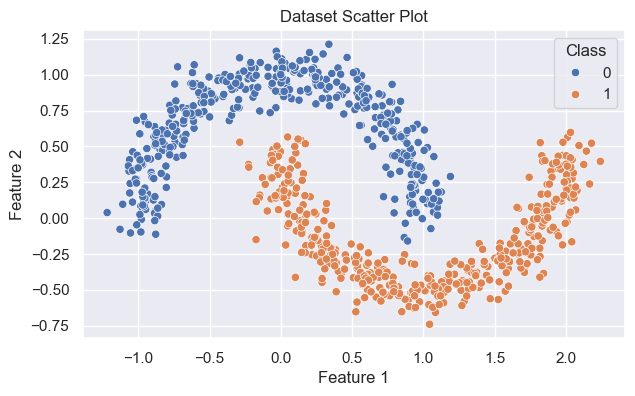

In [2]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
y = y.reshape(-1, 1)
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

y_train_labels = np.argmax(y_train, axis=1)
# Create a scatter plot
plt.figure(figsize=(7,4))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train_labels, palette="deep")
plt.title("Dataset Scatter Plot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Class")
plt.show()

## Model Building

Epoch: 0, Traning Loss: 0.34, F-1 Score: 0.85
Epoch: 1, Traning Loss: 0.22, F-1 Score: 0.9
Epoch: 2, Traning Loss: 0.17, F-1 Score: 0.92
Epoch: 3, Traning Loss: 0.06, F-1 Score: 0.99
Epoch: 4, Traning Loss: 0.03, F-1 Score: 0.98
Epoch: 5, Traning Loss: 0.01, F-1 Score: 1.0
Epoch: 6, Traning Loss: 0.01, F-1 Score: 1.0
Epoch: 7, Traning Loss: 0.01, F-1 Score: 1.0
Epoch: 8, Traning Loss: 0.01, F-1 Score: 1.0
Epoch: 9, Traning Loss: 0.01, F-1 Score: 0.99


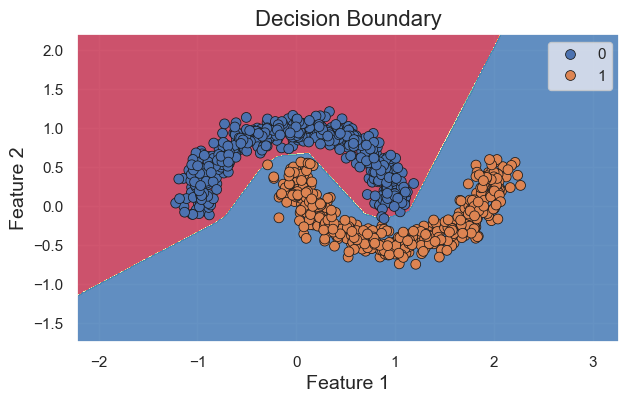

In [3]:
layer_1 = {"activation": "relu",
           "weight_init": "xavier_uniform",
           "n_out": 10}
layer_out ={"activation": "softmax",
            "weight_init": "xavier_uniform",
            "n_out": None}

layer_args = [layer_1, layer_out]

optimizer_args = {"name": "RMSpropNesterov", 
                  "lr": 0.01,
                  "beta1": 0.9,
                  "epsilon": 1e-8,
                  "momentum": 0.9}

nn = NeuralNetwork(loss="cross_entropy",
                   layer_args=layer_args, 
                   optimizer_args=optimizer_args)

nn.train(X, y_onehot, epochs=10)
plot_decision_boundary(nn, X, y_onehot)

## TensorFlow Comparison 

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import F1Score

Epoch 1/10


/Users/safo/Desktop/NN from Scratch/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - F1Score: 0.6671 - loss: 0.5327
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - F1Score: 0.8980 - loss: 0.2466
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - F1Score: 0.9466 - loss: 0.1301
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - F1Score: 0.9767 - loss: 0.0588
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - F1Score: 0.9887 - loss: 0.0315
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - F1Score: 0.9943 - loss: 0.0248
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - F1Score: 0.9878 - loss: 0.0459
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - F1Score: 0.9991 - loss: 0.0100
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - F1Score: 0.9982 - loss: 0.0137
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - F1Score: 1.0000 - loss: 0.0069
6807/6807 ━━━━━━━━━━━━━━━━━━━━ 1s 161us/step


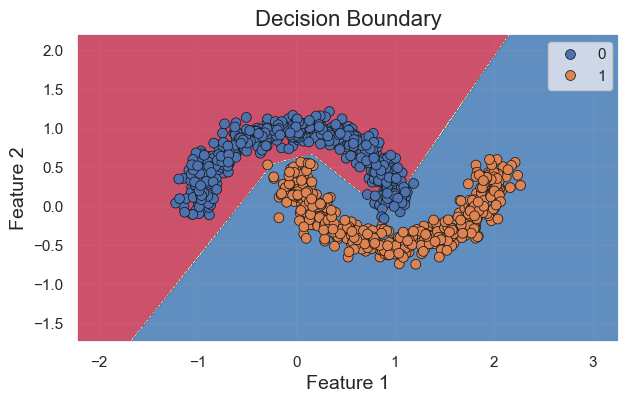

In [6]:
# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='glorot_uniform', input_shape=(X.shape[1],)))
model.add(Dense(y_onehot.shape[1], activation='softmax', kernel_initializer='glorot_uniform'))
optimizer = RMSprop(learning_rate=0.01, rho=0.9, epsilon=1e-8, momentum=0.9)
model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['F1Score'])
# Train the model
model.fit(X, y_onehot, epochs=10)

plot_decision_boundary(model, X, y_onehot)
